In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
data = pd.read_csv(r"C:\Users\dubey\OneDrive\Desktop\Presidency summer intership\nci.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6821,V6822,V6823,V6824,V6825,V6826,V6827,V6828,V6829,V6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [15]:
# Transpose the data so that rows are cells and columns are genes
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
V1,0.300,0.679961,0.940,0.280,0.485,0.310,-0.830,-0.190,0.460,0.760,...,0.010,-0.620,-0.380,0.04998,0.650,-0.030,-0.270,0.210,-0.050,0.350
V2,1.180,1.289961,-0.040,-0.310,-0.465,-0.030,0.000,-0.870,0.000,1.490,...,-1.280,-0.130,0.000,-0.72002,0.640,-0.480,0.630,-0.620,0.140,-0.270
V3,0.550,0.169961,-0.170,0.680,0.395,-0.100,0.130,-0.450,1.150,0.280,...,-0.770,0.200,-0.060,0.41998,0.150,0.070,-0.100,-0.150,-0.090,0.020
V4,1.140,0.379961,-0.040,-0.810,0.905,-0.460,-1.630,0.080,-1.400,0.100,...,0.940,-1.410,0.800,0.92998,-1.970,-0.700,1.100,-1.330,-1.260,-1.230
V5,-0.265,0.464961,-0.605,0.625,0.200,-0.205,0.075,0.005,-0.005,-0.525,...,-0.015,1.585,-0.115,-0.09502,-0.065,-0.195,1.045,0.045,0.045,-0.715


In [3]:
# Assume the first row contains class labels
class_labels = data.iloc[0].tolist()
data = data.iloc[1:]
data


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
V2,1.180,1.289961,-0.040,-3.100000e-01,-0.465,-0.03000,0.00000,-0.87000,0.00000,1.49000,...,-1.280,-0.13000,0.000,-0.720020,0.640,-0.48000,0.63000,-0.620,1.400000e-01,-0.27000
V3,0.550,0.169961,-0.170,6.800000e-01,0.395,-0.10000,0.13000,-0.45000,1.15000,0.28000,...,-0.770,0.20000,-0.060,0.419980,0.150,0.07000,-0.10000,-0.150,-9.000000e-02,0.02000
V4,1.140,0.379961,-0.040,-8.100000e-01,0.905,-0.46000,-1.63000,0.08000,-1.40000,0.10000,...,0.940,-1.41000,0.800,0.929980,-1.970,-0.70000,1.10000,-1.330,-1.260000e+00,-1.23000
V5,-0.265,0.464961,-0.605,6.250000e-01,0.200,-0.20500,0.07500,0.00500,-0.00500,-0.52500,...,-0.015,1.58500,-0.115,-0.095020,-0.065,-0.19500,1.04500,0.045,4.500000e-02,-0.71500
V6,-0.070,0.579961,0.000,-1.387779e-17,-0.005,-0.54000,-0.36000,0.35000,-0.70000,0.36000,...,0.270,1.16000,0.180,0.199981,0.130,0.41000,0.08000,-0.400,-2.710505e-20,-0.34000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6826,-0.030,-0.860039,-0.150,-3.000000e-01,0.605,-0.40000,0.47000,-0.09000,-0.33000,-0.33000,...,-0.160,0.31000,-0.840,0.219980,0.220,-0.02000,-0.16000,0.390,-3.500000e-01,0.48000
V6827,0.000,-1.250049,0.000,-1.150010e+00,0.000,0.69999,0.12999,-0.70001,-0.60001,-1.22001,...,0.000,-1.33001,0.000,-1.100029,0.000,-1.39001,-0.02001,0.000,-3.600098e-01,0.96999
V6828,0.280,-0.770039,-0.120,1.090000e+00,0.745,0.29000,-0.30000,-0.54000,0.83000,-0.17000,...,0.150,-1.21000,-0.580,-0.520019,-0.870,-1.15000,-0.64000,0.160,-4.900000e-01,0.29000
V6829,-0.340,-0.390039,-0.410,-2.600000e-01,0.425,0.55000,0.57000,-0.45000,-0.03000,-0.11000,...,-0.530,0.30000,-0.470,-0.550019,-0.330,0.29000,-0.37000,2.030,1.000000e-02,-0.15000


In [4]:
# Convert the data to a numeric format
data = data.apply(pd.to_numeric)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
V2,1.180,1.289961,-0.040,-3.100000e-01,-0.465,-0.03000,0.00000,-0.87000,0.00000,1.49000,...,-1.280,-0.13000,0.000,-0.720020,0.640,-0.48000,0.63000,-0.620,1.400000e-01,-0.27000
V3,0.550,0.169961,-0.170,6.800000e-01,0.395,-0.10000,0.13000,-0.45000,1.15000,0.28000,...,-0.770,0.20000,-0.060,0.419980,0.150,0.07000,-0.10000,-0.150,-9.000000e-02,0.02000
V4,1.140,0.379961,-0.040,-8.100000e-01,0.905,-0.46000,-1.63000,0.08000,-1.40000,0.10000,...,0.940,-1.41000,0.800,0.929980,-1.970,-0.70000,1.10000,-1.330,-1.260000e+00,-1.23000
V5,-0.265,0.464961,-0.605,6.250000e-01,0.200,-0.20500,0.07500,0.00500,-0.00500,-0.52500,...,-0.015,1.58500,-0.115,-0.095020,-0.065,-0.19500,1.04500,0.045,4.500000e-02,-0.71500
V6,-0.070,0.579961,0.000,-1.387779e-17,-0.005,-0.54000,-0.36000,0.35000,-0.70000,0.36000,...,0.270,1.16000,0.180,0.199981,0.130,0.41000,0.08000,-0.400,-2.710505e-20,-0.34000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6826,-0.030,-0.860039,-0.150,-3.000000e-01,0.605,-0.40000,0.47000,-0.09000,-0.33000,-0.33000,...,-0.160,0.31000,-0.840,0.219980,0.220,-0.02000,-0.16000,0.390,-3.500000e-01,0.48000
V6827,0.000,-1.250049,0.000,-1.150010e+00,0.000,0.69999,0.12999,-0.70001,-0.60001,-1.22001,...,0.000,-1.33001,0.000,-1.100029,0.000,-1.39001,-0.02001,0.000,-3.600098e-01,0.96999
V6828,0.280,-0.770039,-0.120,1.090000e+00,0.745,0.29000,-0.30000,-0.54000,0.83000,-0.17000,...,0.150,-1.21000,-0.580,-0.520019,-0.870,-1.15000,-0.64000,0.160,-4.900000e-01,0.29000
V6829,-0.340,-0.390039,-0.410,-2.600000e-01,0.425,0.55000,0.57000,-0.45000,-0.03000,-0.11000,...,-0.530,0.30000,-0.470,-0.550019,-0.330,0.29000,-0.37000,2.030,1.000000e-02,-0.15000


In [4]:
print(f"Data shape: {data.shape}")

Data shape: (6829, 64)


In [5]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=14, random_state=0).fit(data)
clusters = kmeans.labels_

In [6]:
def lumping_errors(true_classes, predicted_clusters):
    n = len(true_classes)
    lumping_error_count = 0
    for i in range(n):
        for j in range(i+1, n):
            if true_classes[i] != true_classes[j] and predicted_clusters[i] == predicted_clusters[j]:
                lumping_error_count += 1
    return lumping_error_count

In [7]:
def splitting_errors(true_classes, predicted_clusters):
    n = len(true_classes)
    splitting_error_count = 0
    for i in range(n):
        for j in range(i+1, n):
            if true_classes[i] == true_classes[j] and predicted_clusters[i] != predicted_clusters[j]:
                splitting_error_count += 1
    return splitting_error_count

In [8]:
lumping_errors_list = []
splitting_errors_list = []

In [9]:
for _ in range(3):
    kmeans = KMeans(n_clusters=14, random_state=0).fit(data)
    clusters = kmeans.labels_
    lumping_errors_list.append(lumping_errors(class_labels, clusters))
    splitting_errors_list.append(splitting_errors(class_labels, clusters))

In [10]:
print("Lumping errors in three runs:", lumping_errors_list)
print("Splitting errors in three runs:", splitting_errors_list)

Lumping errors in three runs: [572, 572, 572]
Splitting errors in three runs: [5, 5, 5]


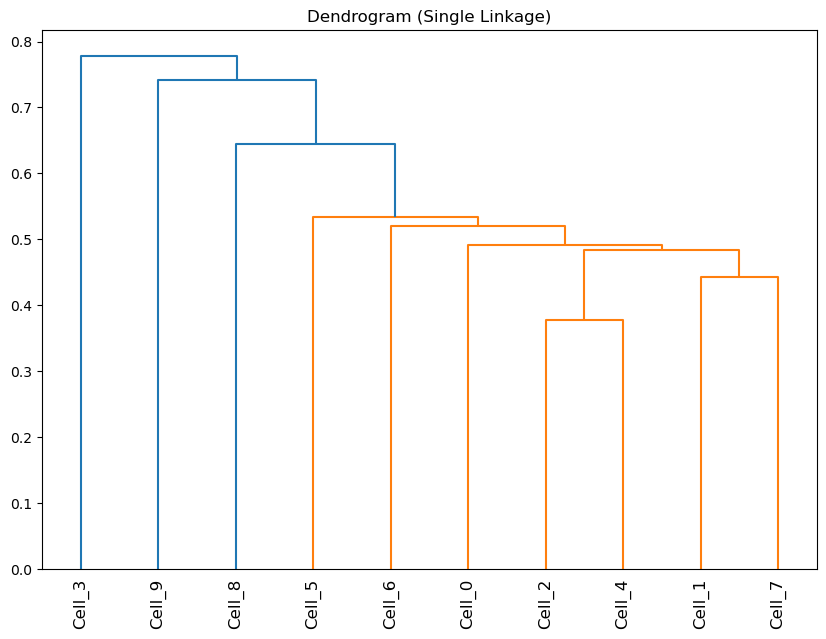

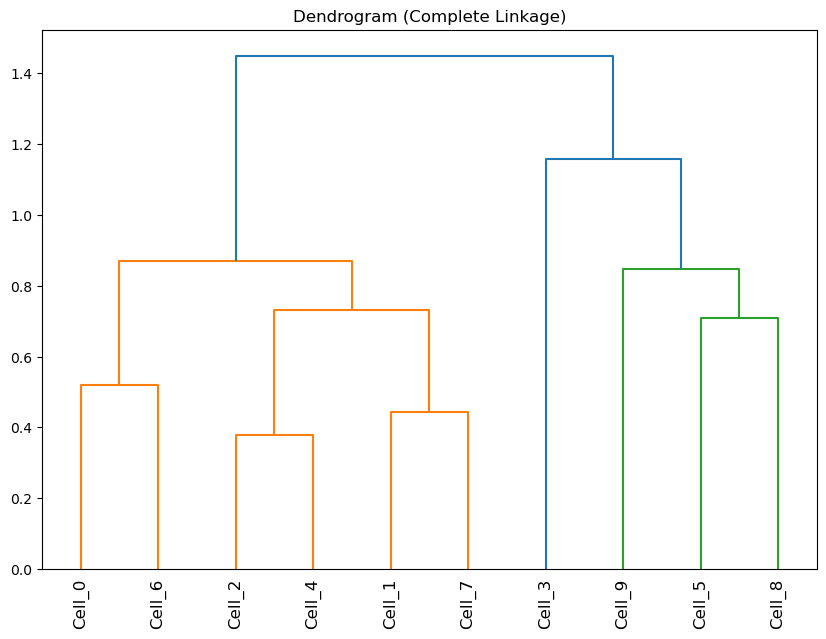

In [11]:

# Create a synthetic small dataset
np.random.seed(0)
data_small = pd.DataFrame(np.random.rand(10, 5), columns=[f'Gene_{i}' for i in range(5)], index=[f'Cell_{i}' for i in range(10)])

# Perform hierarchical clustering with Single linkage
single_linkage_small = linkage(data_small, method='single')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(single_linkage_small, labels=data_small.index.tolist(), leaf_rotation=90)
plt.title("Dendrogram (Single Linkage)")
plt.show()

# Perform hierarchical clustering with Complete linkage
complete_linkage_small = linkage(data_small, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(complete_linkage_small, labels=data_small.index.tolist(), leaf_rotation=90)
plt.title("Dendrogram (Complete Linkage)")
plt.show()

Number of principal components: 64


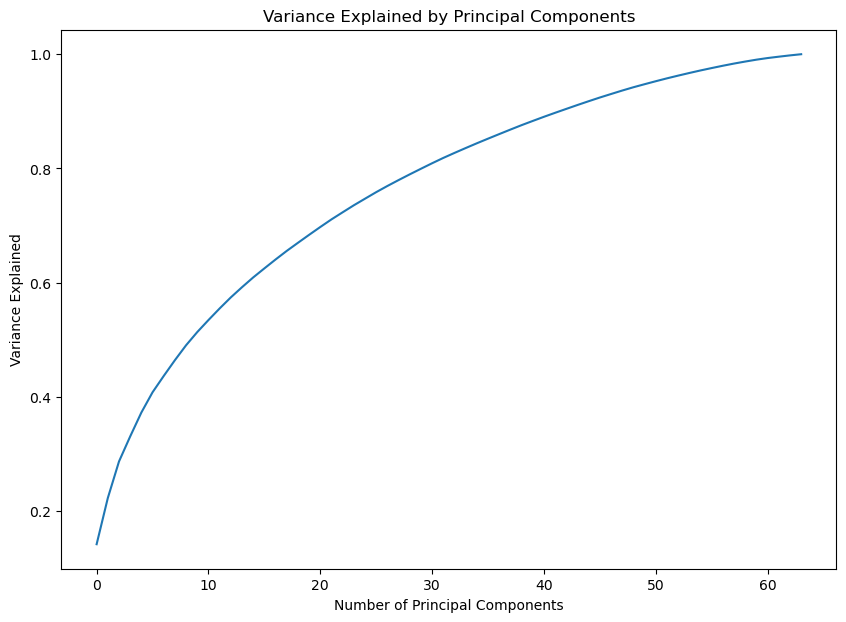

In [12]:
# Perform PCA
pca = PCA()
pca.fit(data)

# Variances associated with the principal components
variances = pca.explained_variance_ratio_

# Number of principal components
n_components = pca.n_components_
print("Number of principal components:", n_components)

# Plot the fraction of total variance retained by the first q components
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(variances))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

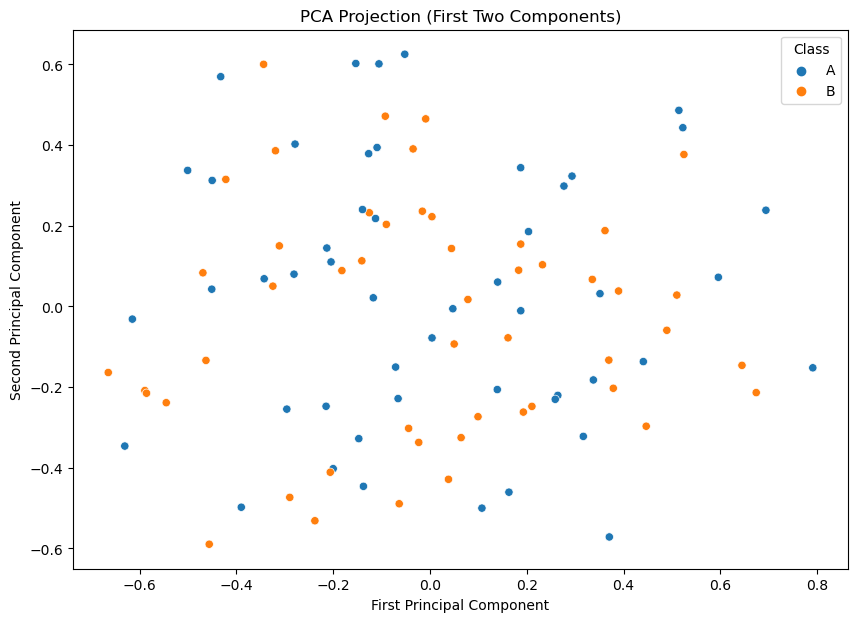

In [13]:

# Sample data and class_labels for demonstration
# Replace these with your actual data and class_labels
data = pd.DataFrame(np.random.rand(100, 5))  # 100 rows, 5 columns of random data
class_labels = np.random.choice(['A', 'B'], size=100)  # 100 class labels

# Ensure data and class_labels are aligned
if len(class_labels) != data.shape[0]:
    print("Mismatch detected!")
    print(f"Length of class_labels: {len(class_labels)}")
    print(f"Number of rows in data: {data.shape[0]}")
    
    # Additional check for possible issues
    print("Class labels extracted:", class_labels[:10])  # Print first 10 class labels for inspection
    print("Last few rows of data (to match class labels):")
    print(data.tail())
    
    raise ValueError("Length of class_labels does not match number of rows in data.")

# PCA projection of each cell onto the first two principal components
pca = PCA(n_components=2)
projections = pca.fit_transform(data)

# Create a DataFrame for plotting
plot_data = pd.DataFrame(projections, columns=['PC1', 'PC2'])

# Verify lengths before adding class labels
if len(class_labels) != len(plot_data):
    raise ValueError(f"Length of class_labels ({len(class_labels)}) does not match length of plot_data ({len(plot_data)}).")

# Add class labels to plot_data
plot_data['Class'] = class_labels

# Plot PCA projection
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=plot_data)
plt.title('PCA Projection (First Two Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Class')
plt.show()

In [16]:
# Extract the class labels from the last column
class_labels = data.iloc[:, -1]  # Last column as class labels

# Extract feature columns (excluding the last column)
features = data.iloc[:, :-1]  # All columns except the last one
# Print class labels for inspection
print("First few class labels:")
print(class_labels.head())

# Ensure the features and class_labels are correctly aligned
if len(class_labels) != features.shape[0]:
    print("Mismatch detected!")
    print(f"Length of class_labels: {len(class_labels)}")
    print(f"Number of rows in features: {features.shape[0]}")
    
    # Additional check for possible issues
    print("First few class labels:")
    print(class_labels.head())
    print("First few rows of features:")
    print(features.head())
    
    raise ValueError("Length of class_labels does not match number of rows in features.")

First few class labels:
V1    0.350
V2   -0.270
V3    0.020
V4   -1.230
V5   -0.715
Name: 63, dtype: float64


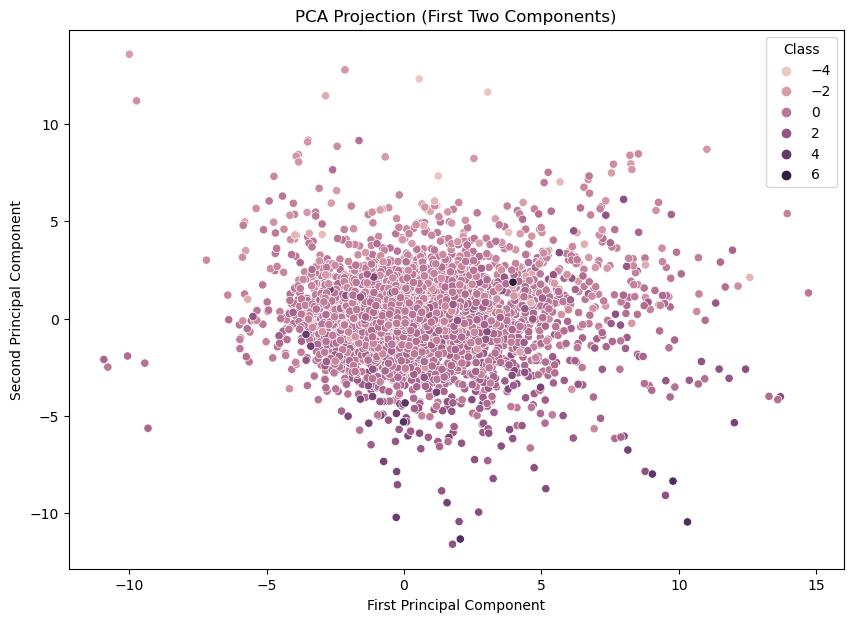

In [17]:
# Perform PCA
pca = PCA(n_components=2)
projections = pca.fit_transform(features)

# Create a DataFrame for the projections
projections_df = pd.DataFrame(projections, columns=['PC1', 'PC2'])
projections_df['Class'] = class_labels.values  # Ensure class labels are aligned

# Plot PCA projection for all classes
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=projections_df)
plt.title('PCA Projection (First Two Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Class')
plt.show()


In [18]:
# Perform PCA
pca = PCA(n_components=2)
projections = pca.fit_transform(features)

# Create a DataFrame for the projections
projections_df = pd.DataFrame(projections, columns=['PC1', 'PC2'])
projections_df['Class'] = class_labels.values  # Ensure class labels are aligned


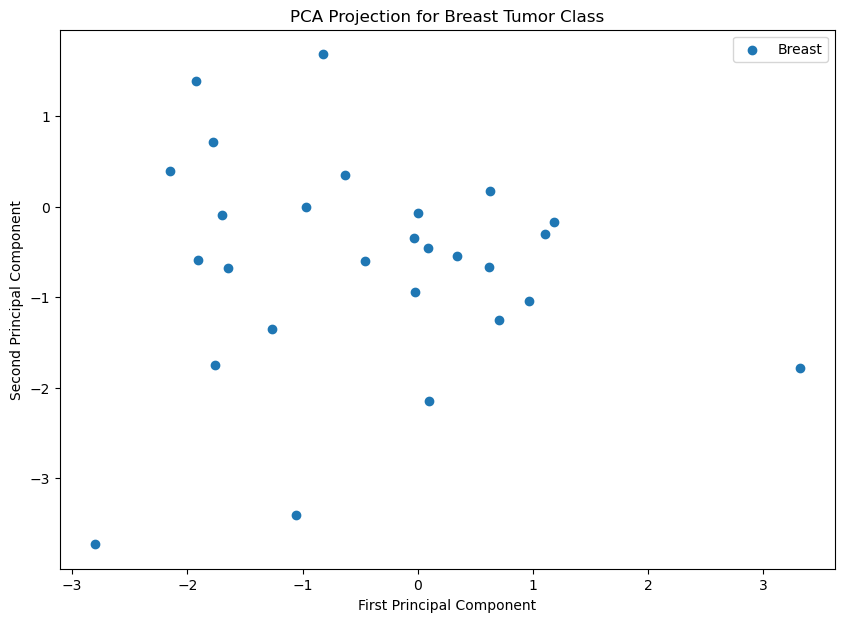

In [19]:
# Identify and plot specific tumor classes
# Replace with actual numeric values
breast_class_value = 0.350  # Replace with actual numeric class value for 'breast'
breast_projections = projections_df[projections_df['Class'] == breast_class_value]

plt.figure(figsize=(10, 7))
plt.scatter(breast_projections['PC1'], breast_projections['PC2'], label='Breast')
plt.title('PCA Projection for Breast Tumor Class')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

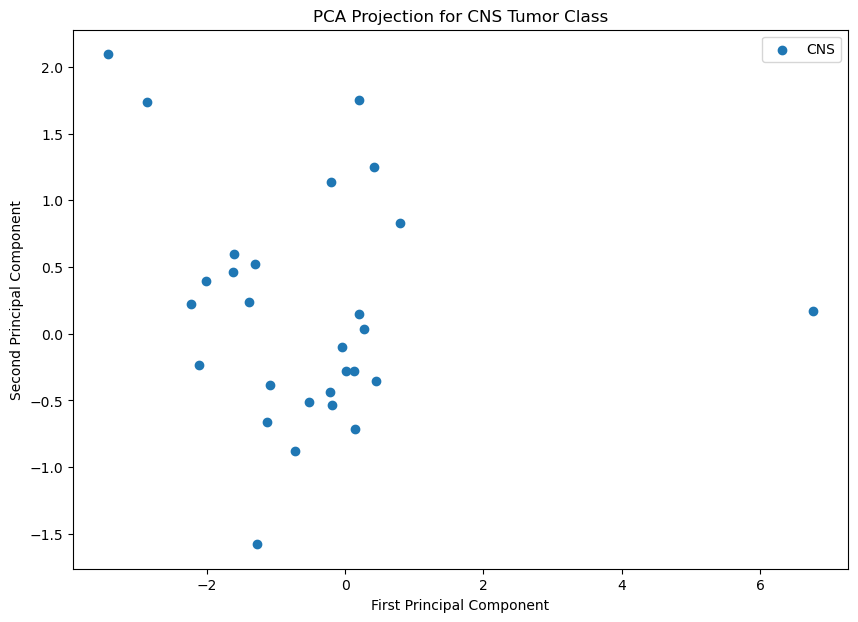

In [20]:
cns_class_value = 0.020  # Replace with actual numeric class value for 'cns'
cns_projections = projections_df[projections_df['Class'] == cns_class_value]

plt.figure(figsize=(10, 7))
plt.scatter(cns_projections['PC1'], cns_projections['PC2'], label='CNS')
plt.title('PCA Projection for CNS Tumor Class')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()